# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img, img_to_array
import keras
from keras import models, layers
from keras.regularizers import l1, l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [21]:
def create_padding(input_image, d):

    #TODO
    output_image = np.pad(input_image, pad_width=d, mode="constant", constant_values=0)
    return output_image


**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [23]:
def convolution(input_image, kernel):

    #TODO
    # output_image = keras.layers.Conv2D(1,3)(input_image)
    arr = np.asarray(input_image)
    arr = arr[:,:,0]
    n,m = arr.shape
    k = kernel.shape[0]
    output_image = np.zeros((n-k+1,m-k+1))
    for i in range(n-k+1):
      for j in range(m-k+1):
        matrix = arr[i:i+k, j:j+k]
        temp = np.einsum("i,i->",kernel.flatten(),matrix.flatten())
        output_image[i][j] = np.maximum(temp,0)

    return output_image

**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [24]:
def pooling(input_image, p, pooling_type = "max_pooling"):

    if pooling_type == "max_pooling":

        #TODO
        # max_pooling2D = keras.layers.MaxPool2D(pool_size=(p,p), strides=(1,1))
        # output_image = max_pooling2D(input_image)
        n,m = input_image.shape
        output_image = np.zeros((n-p+1,m-p+1))
        for i in range(n-p+1):
          for j in range(m-p+1):
            matrix = input_image[i:i+p, j:j+p]
            output_image[i][j] = np.max(matrix.flatten())
        pass

    elif pooling_type == "avg_pooling":

        #TODO
        # avg_pooling2D = keras.layers.AveragePooling2D(pool_size=(p,p), strides=(1,1))
        # output_image = avg_pooling2D(input_image)
        n,m = input_image.size
        output_image = np.zeros((n-p+1,m-p+1))
        for i in range(n-p+1):
          for j in range(m-p+1):
            matrix = input_image[i:i+p, j:j+p]
            output_image[i][j] = np.average(matrix.flatten())
        pass

    else:
        print("Error: Invalid pooling type")
        return

    return(output_image)


The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

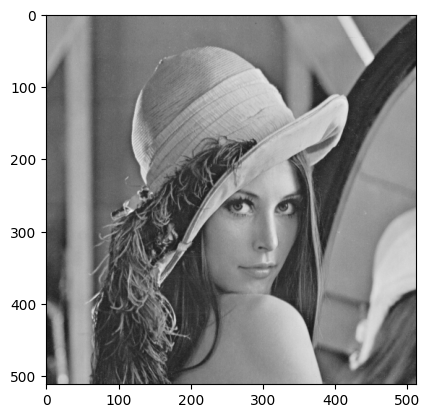

In [25]:
lena = load_img('/kaggle/input/lenaimage/lena.gif')
plt.imshow(lena)
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$

3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

**Answer** (to write answers edit this cell)

K1 = This is a vertical edge detection filter. it highlights verticle edges in an image. When there is a transition from dark to light vertically, this will highlish it.\
K2 = This is a horizontal edge detection filter. it highlights horizontal edges in an image. When there is a transition from dark to light horizontally, this will highlish it.\
K3 = This is another vertical edge detector, but this will show stronger verticle edges in the output image.\
k4 = This is another horizontal edge detector, but this will show stronger horizontal edges in the output image.\
k5 = This will highlight the changes diagonally.

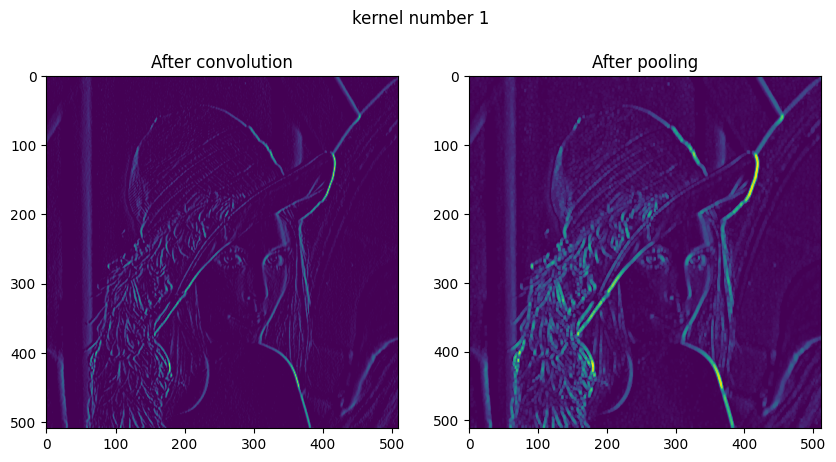

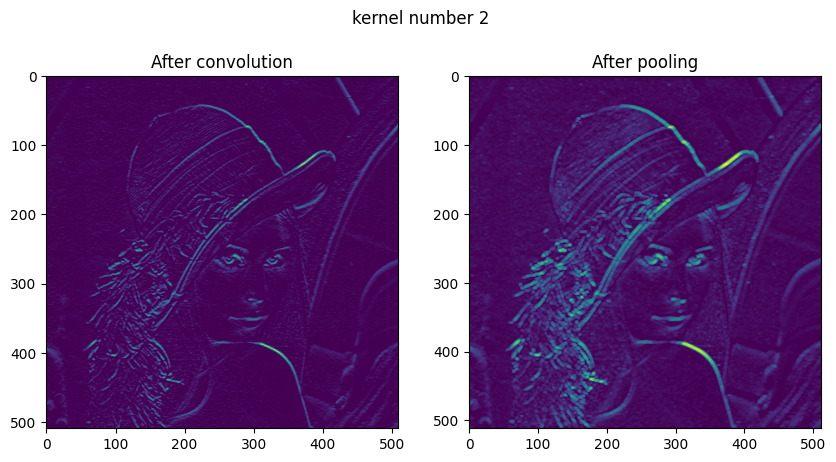

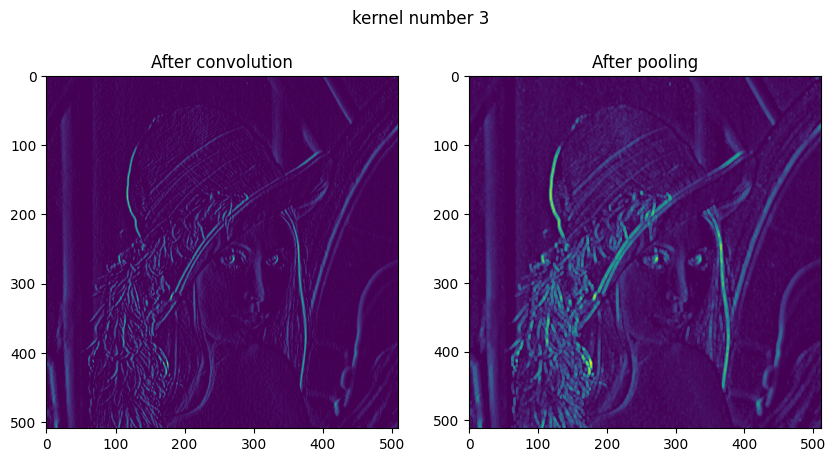

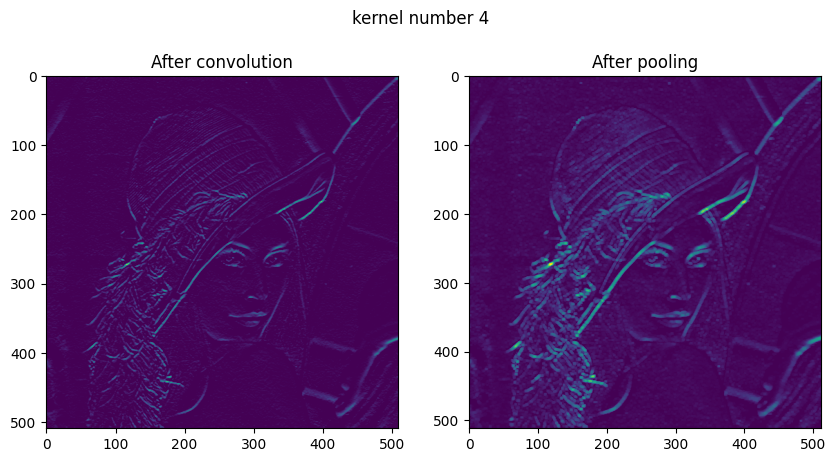

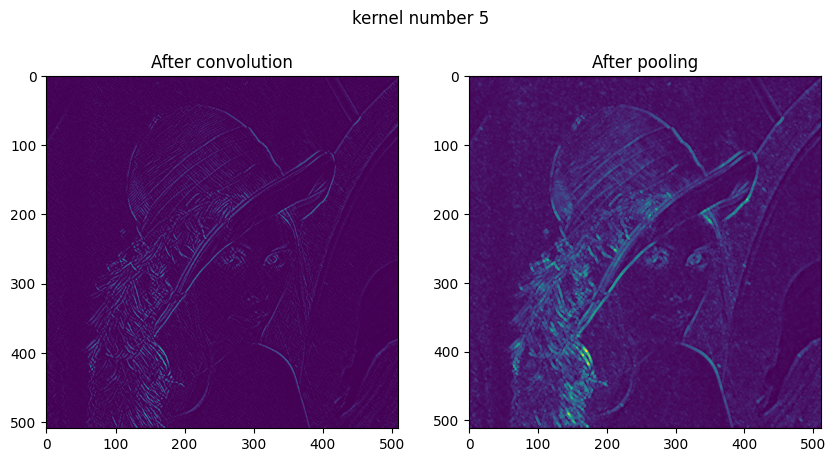

In [13]:
#TODO
#Write code to use your convolution and pooling methods.
k1 = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
k2 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
k3 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
k4 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
k5 = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])

# lena_array = img_to_array(lena)
# lena_array = np.expand_dims(lena_array, axis=0)

def conv_pool_plot(k,i):
    conv_image = convolution(lena,k)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(conv_image)
    plt.title("After convolution")

    conv_image = create_padding(conv_image, k.shape[0]-1)

    pooled_image = pooling(conv_image,3)
    plt.subplot(1,2,2)
    plt.imshow(pooled_image)
    plt.title("After pooling")

    plt.suptitle("kernel number "+str(i))
    plt.show()

    return

# k1
conv_pool_plot(k1,1)
# k2
conv_pool_plot(k2,2)
# k3
conv_pool_plot(k3,3)
# k4
conv_pool_plot(k4,4)
# k5
conv_pool_plot(k5,5)

Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** (to write answers edit this cell)

k1, k3 = Vertical edges are highlighted.\
k2, k4 = Horizontal edges are highlighted.\
k5 = Diagonal changes are highlighted.\

The experiment is successful as we can clearly see the details of the images through the output images.\
How to use kernels intentionally to obtain information about the images in image classification was observed during this experiment.

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [14]:
#TODO

#Include necessary code in this cell, or cells added below as required.

def CNN(batch_size, no_epochs, l1_val, drop_out, init_lr):

    kfold = KFold(n_splits=5, shuffle=True)
    fold_no = 1
    acc_per_fold = []
    loss_per_fold = []

    all_train_accuracies = []
    all_val_accuracies = []

    for train, val in kfold.split(x_train, y_train):
        
        model = models.Sequential()

        model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32,32,3)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(drop_out))

        model.add(layers.Conv2D(128, (3, 3), activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPool2D((2,2)))
        model.add(layers.Dropout(drop_out))

        model.add(layers.Conv2D(256, (3, 3), activation="relu", kernel_regularizer=l2(l1_val)))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPool2D((2,2)))
        model.add(layers.Dropout(drop_out))

        model.add(layers.Conv2D(512, (3, 3), activation="relu", kernel_regularizer=l2(l1_val)))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPool2D((2,2)))
        model.add(layers.Dropout(drop_out))

        model.add(layers.Flatten())

        model.add(layers.Dense(256, activation="relu", kernel_regularizer=l2(l1_val)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(drop_out))

        model.add(layers.Dense(128, activation="relu", kernel_regularizer=l2(l1_val)))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(drop_out))

        model.add(layers.Dense(10, activation="softmax"))

        model.compile(optimizer=Adam(learning_rate=init_lr),
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                      metrics=["accuracy"])
        
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

        history = model.fit(x_train[train], y_train[train],
                            batch_size=batch_size,
                            epochs=no_epochs,
                            validation_data=(x_train[val], y_train[val]),
                            callbacks=[lr_scheduler, early_stopping])

        all_train_accuracies.append(history.history["accuracy"])
        all_val_accuracies.append(history.history["val_accuracy"])

        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f'Score for fold {fold_no}: test loss of {test_loss}; test accuracy of {test_acc*100}%')
        acc_per_fold.append(test_acc * 100)
        loss_per_fold.append(test_loss)
        
        y_pred = model.predict(x_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        
        cm = confusion_matrix(y_test, y_pred_classes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for Fold {fold_no}')
        plt.show()
        
        report = classification_report(y_test, y_pred_classes, target_names=[f'Class {i}' for i in range(10)])
        print(f'Classification Report for Fold {fold_no}:\n{report}')


        fold_no += 1

    plt.figure(figsize=(15, 8))
    for i in range(len(all_train_accuracies)):
        plt.subplot(2,3,i+1)
        plt.plot(all_train_accuracies[i], label="Train Accuracy")
        plt.plot(all_val_accuracies[i], label="Validation Accuracy")
        plt.title(f"Train / Val Accuracy for Fold {i}")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
    plt.show()

    avg_test_loss = np.average(loss_per_fold)
    avg_test_acc = np.average(acc_per_fold)
    print(f'Average test loss = {avg_test_loss}; Average test accuracy = {avg_test_acc}%')
    return

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.2024 - loss: 8.1069 - val_accuracy: 0.3093 - val_loss: 5.6062 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.3750 - loss: 4.9492 - val_accuracy: 0.3097 - val_loss: 3.9574 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.4742 - loss: 3.2297 - val_accuracy: 0.3800 - val_loss: 2.9975 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.5322 - loss: 2.5180 - val_accuracy: 0.5520 - val_loss: 2.2704 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5918 - loss: 2.1658 - val_accuracy: 0.6011 - val_loss: 2.0648 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6264 - loss: 2.0251 - val_accuracy: 0.6148 - val_loss: 2.0690 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6397 -

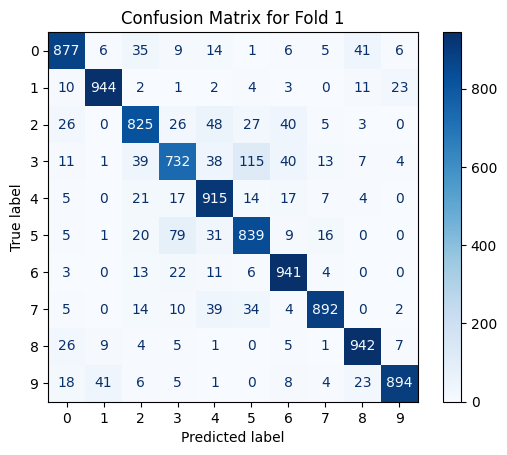

Classification Report for Fold 1:
              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.88      1000
     Class 1       0.94      0.94      0.94      1000
     Class 2       0.84      0.82      0.83      1000
     Class 3       0.81      0.73      0.77      1000
     Class 4       0.83      0.92      0.87      1000
     Class 5       0.81      0.84      0.82      1000
     Class 6       0.88      0.94      0.91      1000
     Class 7       0.94      0.89      0.92      1000
     Class 8       0.91      0.94      0.93      1000
     Class 9       0.96      0.89      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 122ms/step - accuracy: 0.1983 - loss: 8.0839 - val_accuracy: 0.2497 - val_loss: 5.7746 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3674 - loss: 4.9646 - val_accuracy: 0.2493 - val_loss: 3.9941 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4637 - loss: 3.2755 - val_accuracy: 0.3833 - val_loss: 3.0125 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5268 - loss: 2.5158 - val_accuracy: 0.5607 - val_loss: 2.2336 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5818 - loss: 2.1691 - val_accuracy: 0.5905 - val_loss: 2.1159 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6209 - loss: 2.0660 - val_accuracy: 0.6148 - val_loss: 2.0754 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6418 -

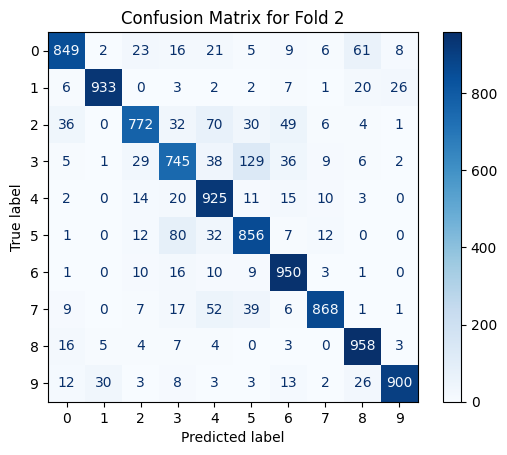

Classification Report for Fold 2:
              precision    recall  f1-score   support

     Class 0       0.91      0.85      0.88      1000
     Class 1       0.96      0.93      0.95      1000
     Class 2       0.88      0.77      0.82      1000
     Class 3       0.79      0.74      0.77      1000
     Class 4       0.80      0.93      0.86      1000
     Class 5       0.79      0.86      0.82      1000
     Class 6       0.87      0.95      0.91      1000
     Class 7       0.95      0.87      0.91      1000
     Class 8       0.89      0.96      0.92      1000
     Class 9       0.96      0.90      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - accuracy: 0.2030 - loss: 8.0466 - val_accuracy: 0.2274 - val_loss: 5.7277 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3580 - loss: 4.8972 - val_accuracy: 0.3143 - val_loss: 3.8092 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4604 - loss: 3.2199 - val_accuracy: 0.4465 - val_loss: 2.7956 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5417 - loss: 2.4603 - val_accuracy: 0.4283 - val_loss: 2.6559 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5884 - loss: 2.1642 - val_accuracy: 0.6205 - val_loss: 2.0088 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6198 - loss: 2.0580 - val_accuracy: 0.5629 - val_loss: 2.2512 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6459 -

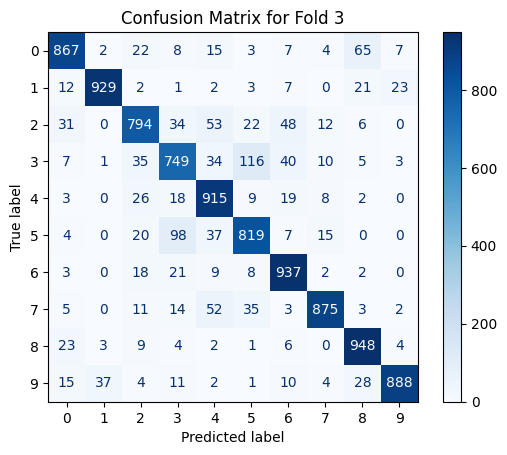

Classification Report for Fold 3:
              precision    recall  f1-score   support

     Class 0       0.89      0.87      0.88      1000
     Class 1       0.96      0.93      0.94      1000
     Class 2       0.84      0.79      0.82      1000
     Class 3       0.78      0.75      0.77      1000
     Class 4       0.82      0.92      0.86      1000
     Class 5       0.81      0.82      0.81      1000
     Class 6       0.86      0.94      0.90      1000
     Class 7       0.94      0.88      0.91      1000
     Class 8       0.88      0.95      0.91      1000
     Class 9       0.96      0.89      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.1919 - loss: 8.0696 - val_accuracy: 0.2569 - val_loss: 5.6347 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3642 - loss: 4.8930 - val_accuracy: 0.2143 - val_loss: 4.2320 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4646 - loss: 3.2023 - val_accuracy: 0.3402 - val_loss: 3.0739 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5353 - loss: 2.4487 - val_accuracy: 0.4731 - val_loss: 2.4292 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5794 - loss: 2.2208 - val_accuracy: 0.6346 - val_loss: 2.0392 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6175 - loss: 2.0673 - val_accuracy: 0.6518 - val_loss: 1.9777 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6315 -

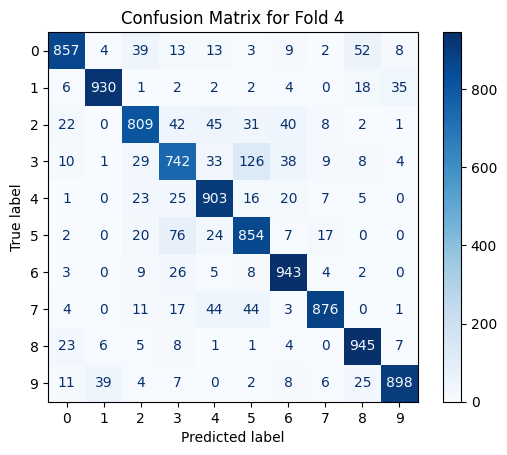

Classification Report for Fold 4:
              precision    recall  f1-score   support

     Class 0       0.91      0.86      0.88      1000
     Class 1       0.95      0.93      0.94      1000
     Class 2       0.85      0.81      0.83      1000
     Class 3       0.77      0.74      0.76      1000
     Class 4       0.84      0.90      0.87      1000
     Class 5       0.79      0.85      0.82      1000
     Class 6       0.88      0.94      0.91      1000
     Class 7       0.94      0.88      0.91      1000
     Class 8       0.89      0.94      0.92      1000
     Class 9       0.94      0.90      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.2082 - loss: 7.9969 - val_accuracy: 0.1686 - val_loss: 6.4001 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3724 - loss: 4.8786 - val_accuracy: 0.2185 - val_loss: 4.2185 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4770 - loss: 3.2046 - val_accuracy: 0.3687 - val_loss: 3.0346 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5363 - loss: 2.4992 - val_accuracy: 0.4905 - val_loss: 2.4483 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5853 - loss: 2.2147 - val_accuracy: 0.5681 - val_loss: 2.2207 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6187 - loss: 2.0955 - val_accuracy: 0.6051 - val_loss: 2.0792 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6433 -

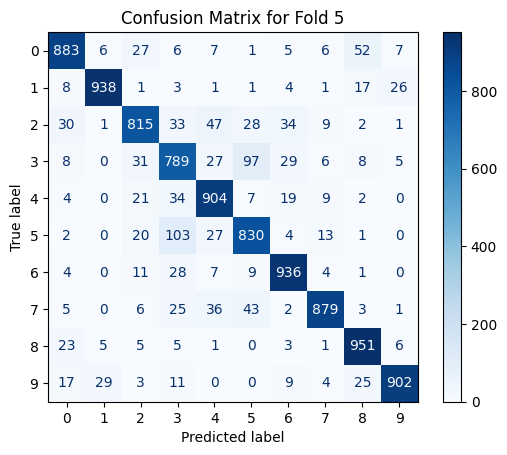

Classification Report for Fold 5:
              precision    recall  f1-score   support

     Class 0       0.90      0.88      0.89      1000
     Class 1       0.96      0.94      0.95      1000
     Class 2       0.87      0.81      0.84      1000
     Class 3       0.76      0.79      0.77      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.82      0.83      0.82      1000
     Class 6       0.90      0.94      0.92      1000
     Class 7       0.94      0.88      0.91      1000
     Class 8       0.90      0.95      0.92      1000
     Class 9       0.95      0.90      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



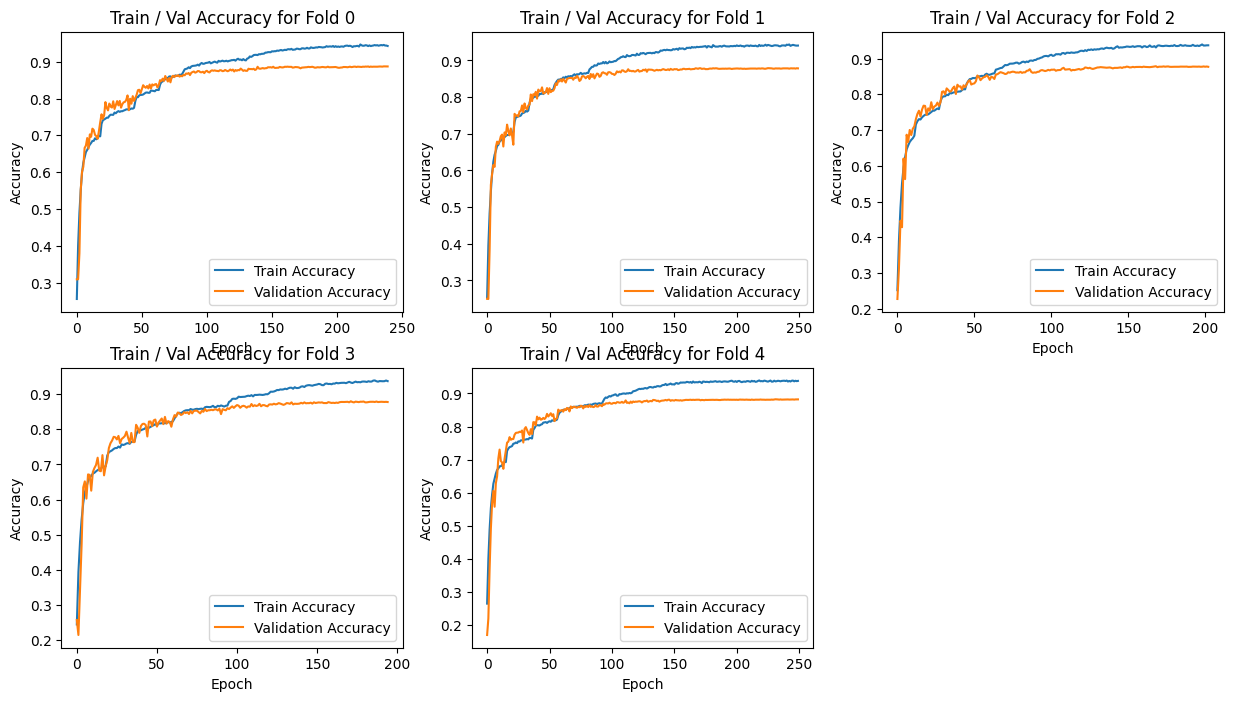

Average test loss = 0.6231774806976318; Average test accuracy = 87.7240002155304%


In [16]:
CNN(batch_size=256, no_epochs=250, l1_val=0.005, drop_out=0.5, init_lr=0.001)

Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 130ms/step - accuracy: 0.1993 - loss: 12.6551 - val_accuracy: 0.1846 - val_loss: 7.0259 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3898 - loss: 5.5128 - val_accuracy: 0.1803 - val_loss: 4.1671 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.4930 - loss: 3.0798 - val_accuracy: 0.4522 - val_loss: 2.7300 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5523 - loss: 2.4687 - val_accuracy: 0.5257 - val_loss: 2.4628 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.5878 - loss: 2.3367 - val_accuracy: 0.5801 - val_loss: 2.2935 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6098 - loss: 2.3012 - val_accuracy: 0.5378 - val_loss: 2.4786 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6258 

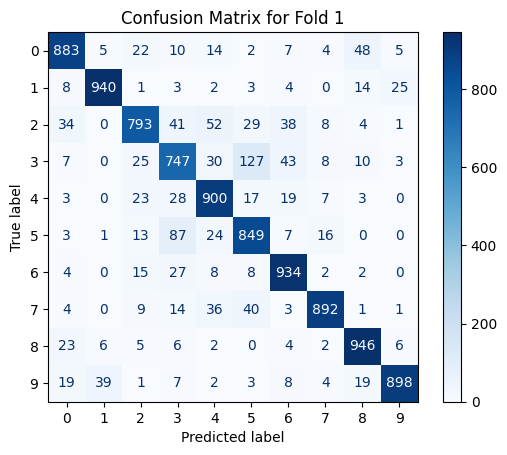

Classification Report for Fold 1:
              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.89      1000
     Class 1       0.95      0.94      0.94      1000
     Class 2       0.87      0.79      0.83      1000
     Class 3       0.77      0.75      0.76      1000
     Class 4       0.84      0.90      0.87      1000
     Class 5       0.79      0.85      0.82      1000
     Class 6       0.88      0.93      0.90      1000
     Class 7       0.95      0.89      0.92      1000
     Class 8       0.90      0.95      0.92      1000
     Class 9       0.96      0.90      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 118ms/step - accuracy: 0.2058 - loss: 12.5009 - val_accuracy: 0.2148 - val_loss: 6.5778 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.3882 - loss: 5.1871 - val_accuracy: 0.3086 - val_loss: 3.6255 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.4876 - loss: 2.9726 - val_accuracy: 0.3569 - val_loss: 2.9844 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5610 - loss: 2.4213 - val_accuracy: 0.4924 - val_loss: 2.5237 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5869 - loss: 2.3405 - val_accuracy: 0.5243 - val_loss: 2.5396 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6177 - loss: 2.2713 - val_accuracy: 0.5436 - val_loss: 2.5934 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6237 

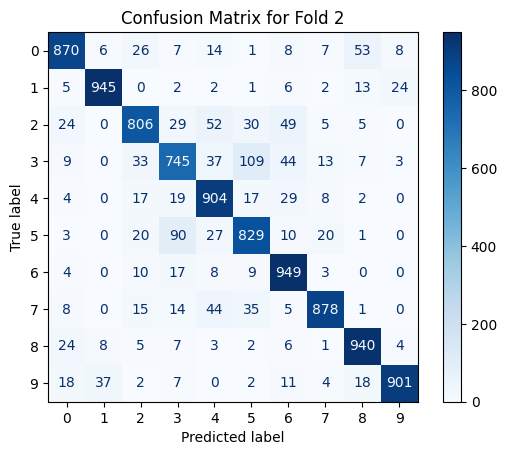

Classification Report for Fold 2:
              precision    recall  f1-score   support

     Class 0       0.90      0.87      0.88      1000
     Class 1       0.95      0.94      0.95      1000
     Class 2       0.86      0.81      0.83      1000
     Class 3       0.80      0.74      0.77      1000
     Class 4       0.83      0.90      0.86      1000
     Class 5       0.80      0.83      0.81      1000
     Class 6       0.85      0.95      0.90      1000
     Class 7       0.93      0.88      0.90      1000
     Class 8       0.90      0.94      0.92      1000
     Class 9       0.96      0.90      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.2026 - loss: 12.5387 - val_accuracy: 0.2333 - val_loss: 6.5459 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3815 - loss: 5.2183 - val_accuracy: 0.2506 - val_loss: 3.8071 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4819 - loss: 3.0669 - val_accuracy: 0.5345 - val_loss: 2.6689 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.5422 - loss: 2.5477 - val_accuracy: 0.5736 - val_loss: 2.4138 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5781 - loss: 2.3737 - val_accuracy: 0.6083 - val_loss: 2.2576 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6155 - loss: 2.2964 - val_accuracy: 0.6260 - val_loss: 2.2266 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.6235

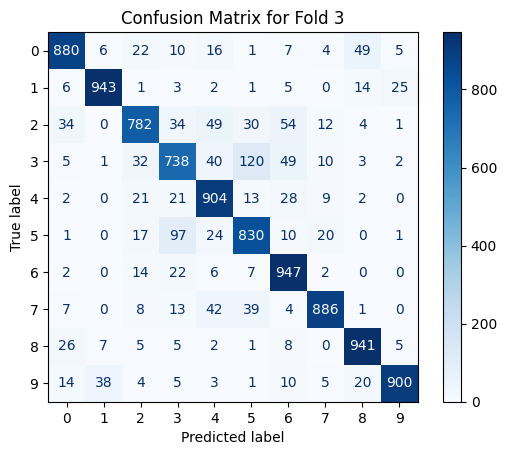

Classification Report for Fold 3:
              precision    recall  f1-score   support

     Class 0       0.90      0.88      0.89      1000
     Class 1       0.95      0.94      0.95      1000
     Class 2       0.86      0.78      0.82      1000
     Class 3       0.78      0.74      0.76      1000
     Class 4       0.83      0.90      0.87      1000
     Class 5       0.80      0.83      0.81      1000
     Class 6       0.84      0.95      0.89      1000
     Class 7       0.93      0.89      0.91      1000
     Class 8       0.91      0.94      0.93      1000
     Class 9       0.96      0.90      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 119ms/step - accuracy: 0.2064 - loss: 12.5284 - val_accuracy: 0.1842 - val_loss: 6.5860 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.3745 - loss: 5.2654 - val_accuracy: 0.2903 - val_loss: 3.6002 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4777 - loss: 2.9898 - val_accuracy: 0.4624 - val_loss: 2.6778 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5452 - loss: 2.4948 - val_accuracy: 0.5853 - val_loss: 2.3156 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5838 - loss: 2.3576 - val_accuracy: 0.5793 - val_loss: 2.3510 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6094 - loss: 2.3002 - val_accuracy: 0.5722 - val_loss: 2.3504 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6277 

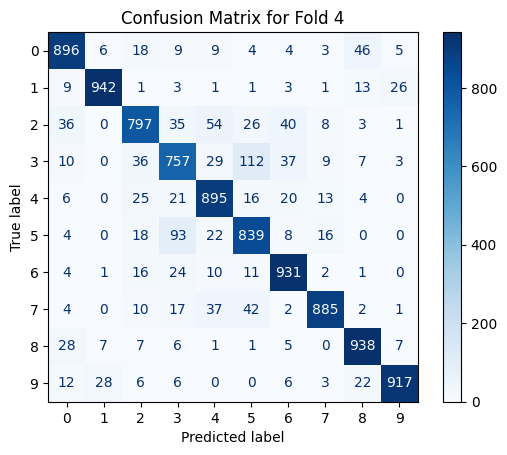

Classification Report for Fold 4:
              precision    recall  f1-score   support

     Class 0       0.89      0.90      0.89      1000
     Class 1       0.96      0.94      0.95      1000
     Class 2       0.85      0.80      0.82      1000
     Class 3       0.78      0.76      0.77      1000
     Class 4       0.85      0.90      0.87      1000
     Class 5       0.80      0.84      0.82      1000
     Class 6       0.88      0.93      0.91      1000
     Class 7       0.94      0.89      0.91      1000
     Class 8       0.91      0.94      0.92      1000
     Class 9       0.96      0.92      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 125ms/step - accuracy: 0.1974 - loss: 12.5903 - val_accuracy: 0.2296 - val_loss: 6.5739 - learning_rate: 0.0010
Epoch 2/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3780 - loss: 5.2844 - val_accuracy: 0.3102 - val_loss: 3.7279 - learning_rate: 0.0010
Epoch 3/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4826 - loss: 3.0743 - val_accuracy: 0.4859 - val_loss: 2.6392 - learning_rate: 0.0010
Epoch 4/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5524 - loss: 2.4996 - val_accuracy: 0.4693 - val_loss: 2.7227 - learning_rate: 0.0010
Epoch 5/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5933 - loss: 2.3765 - val_accuracy: 0.5262 - val_loss: 2.5900 - learning_rate: 0.0010
Epoch 6/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6090 - loss: 2.3408 - val_accuracy: 0.6585 - val_loss: 2.2079 - learning_rate: 0.0010
Epoch 7/250
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6270 

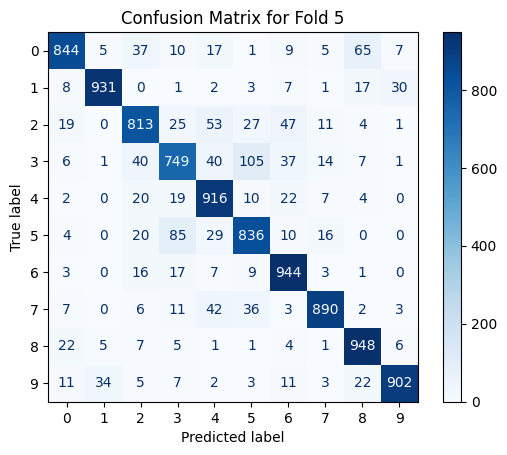

Classification Report for Fold 5:
              precision    recall  f1-score   support

     Class 0       0.91      0.84      0.88      1000
     Class 1       0.95      0.93      0.94      1000
     Class 2       0.84      0.81      0.83      1000
     Class 3       0.81      0.75      0.78      1000
     Class 4       0.83      0.92      0.87      1000
     Class 5       0.81      0.84      0.82      1000
     Class 6       0.86      0.94      0.90      1000
     Class 7       0.94      0.89      0.91      1000
     Class 8       0.89      0.95      0.92      1000
     Class 9       0.95      0.90      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



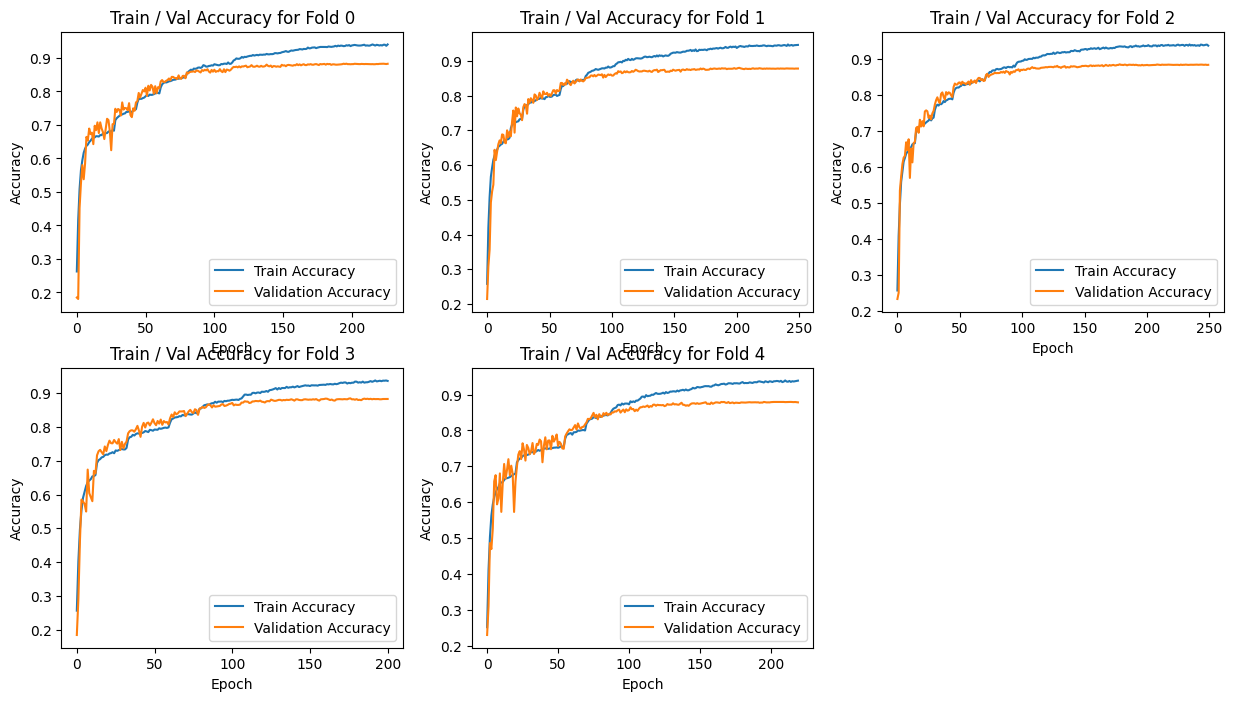

Average test loss = 0.6027082681655884; Average test accuracy = 87.7400004863739%


In [19]:
CNN(batch_size=256, no_epochs=250, l1_val=0.01, drop_out=0.5, init_lr=0.001)

<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** (to write answers edit this cell)

An optimum cross validation accuracy of approximately 88%, of the CNN after many tested network architectures and hyperparameters was achieved. The network architectures were tested, changing the number of convolutional layers, dense layers, regularization methods, and learning rate sheuling methods. The hyperparameters including batch size, leraning rate, l2 regularization coefficient, number of layers in each convolution/dense layer, dropout ratios etc. were changed to obtain a higher accuracy of the system.

The experiment was a success resulting a high accuracy. The above hyperparameters were chosen after many attempts. The second set execution is slightly better than the first one when these two are compared.

I was able to dive deep into how a CNN works, and how I could change the hyperparameters to increase the performance. Also I was able to practically apply the theoritical knowledge by training the dataset.